<a href="https://colab.research.google.com/github/MadernaIV/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
  apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Sánchez", "Romero", "Díaz"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Generar datos aleatorios para el DataFrame
data = []
for i in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = np.random.randint(1, 11)
  nota_2do_trimestre = np.random.randint(1, 11)
  nota_3er_trimestre = np.random.randint(1, 11)
  faltas = np.random.randint(0, 15)
  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido y Nombre", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

df

,Apellido y Nombre,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Pedro González,84560005,Biología,1,8,5,8
1,Laura Romero,25438145,Química,9,5,6,1
2,Juan Martínez,94491656,Sociología,3,10,7,11
3,Juan López,39790558,Biología,9,2,6,3
4,Carlos Rodríguez,18822529,Ciencias Naturales,6,5,4,7
...,...,...,...,...,...,...,...
95,Marta Díaz,83964995,Informática,1,9,5,2
96,Luis Sánchez,42161106,Química,3,6,4,9
97,Luis García,45946274,Música,1,2,9,11
98,Juan López,29788659,Historia,4,2,9,10


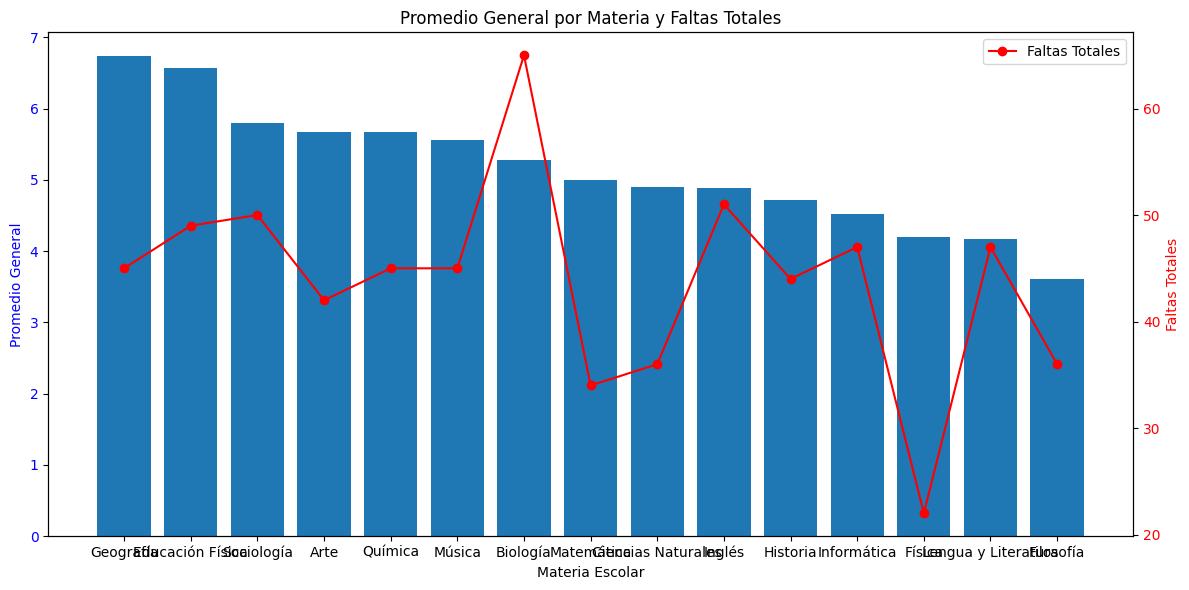

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a Clases'].sum()

# Ordenar las materias por promedio de mayor a menor
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General por Materia y Faltas Totales')

ax2 = ax1.twinx()  # Crear un segundo eje y
ax2.plot(faltas_por_materia.loc[promedio_por_materia_ordenado.index].values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar leyenda
plt.legend(['Faltas Totales', 'Promedio General'])

plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)